<a href="https://colab.research.google.com/github/sidorov-ka/AI_HW1_Regression_with_inference_base/blob/master/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Таков путь!

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [4]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [5]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


In [6]:
df_train.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [7]:
df_test.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


In [8]:
df_train.duplicated().sum()

985

In [9]:
df_test.duplicated().sum()

62

In [10]:
!pip install ydata_profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=be74c1676fa77226689c8c62beb96988714e023e421ec09b0d29451888df5cb7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [11]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Ответ: Так как пропуски только в столбцах с числовыми значениями, имеет смысл преобразовать их во float или int и после заполнить пропуски.

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [12]:
df_features = df_train.drop('selling_price', axis=1)
df_train[df_features.duplicated(keep=False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [13]:
df_train = df_train.drop_duplicates()
df_train.duplicated().sum()
mask = ~df_train.columns.isin(['selling_price'])
columns_to_check = df_train.columns[mask]
df_train = df_train.drop_duplicates(subset=columns_to_check, keep='first').reset_index(drop=True)

In [14]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [15]:
import re

def extract_number_with_regex(value):
    if pd.isnull(value):
        return np.nan
    value_str = str(value)
    match = re.search(r'\d+\.?\d*', value_str)
    return float(match.group()) if match else np.nan

for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].apply(lambda x: extract_number_with_regex(x))
    df_test[col] = df_test[col].apply(lambda x: extract_number_with_regex(x))

df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

In [16]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [17]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0


In [18]:
columns_with_gaps = ['mileage', 'engine', 'max_power', 'seats']

# Здесь учитываем "Важно!"
for column in columns_with_gaps:
    df_train[column] = df_train[column].fillna(df_train[column].median())
    df_test[column] = df_test[column].fillna(df_train[column].median())

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [19]:
int_columns = ['engine', 'seats']

for column in int_columns:
    df_train[column] = df_train[column].astype(int)
    df_test[column] = df_test[column].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [20]:
numerical_cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
df_train[numerical_cols].describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [21]:
df_test[numerical_cols].describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,5.403000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,9.000000


In [22]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    display(df_train[col].value_counts())

,count
fuel,
Diesel,3177
Petrol,2579
CNG,50
LPG,34


,count
seller_type,
Individual,5223
Dealer,592
Trustmark Dealer,25


,count
transmission,
Manual,5336
Automatic,504


,count
owner,
First Owner,3603
Second Owner,1639
Third Owner,454
Fourth & Above Owner,140
Test Drive Car,4


In [23]:
for col in categorical_cols:
    display(df_test[col].value_counts())

,count
fuel,
Diesel,534
Petrol,457
CNG,5
LPG,4


,count
seller_type,
Individual,837
Dealer,135
Trustmark Dealer,28


,count
transmission,
Manual,877
Automatic,123


,count
owner,
First Owner,623
Second Owner,278
Third Owner,71
Fourth & Above Owner,27
Test Drive Car,1


In [24]:
assert df_train.shape == (5840, 12)

Изменил на assert df_train.shape == (5840, 12), так как столбец "torque" был удален

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

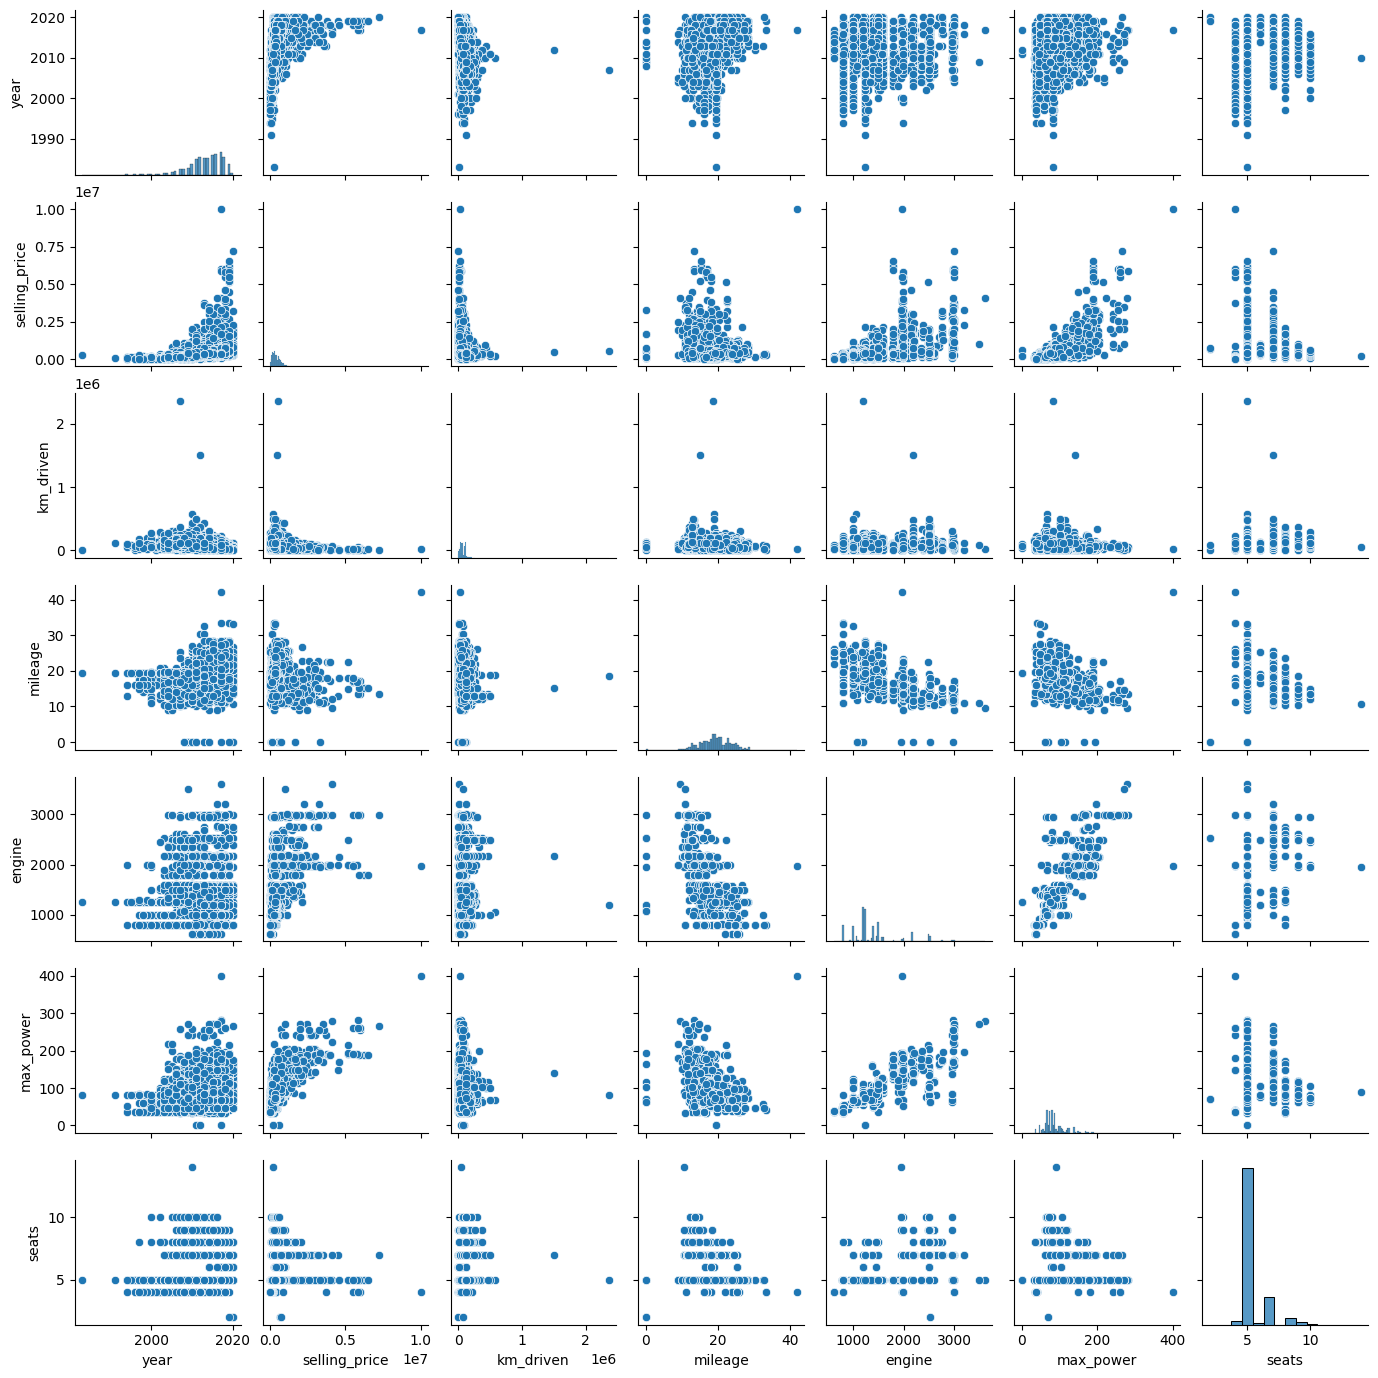

In [ ]:
sns.pairplot(df_train[numerical_cols], height=2)
plt.show()

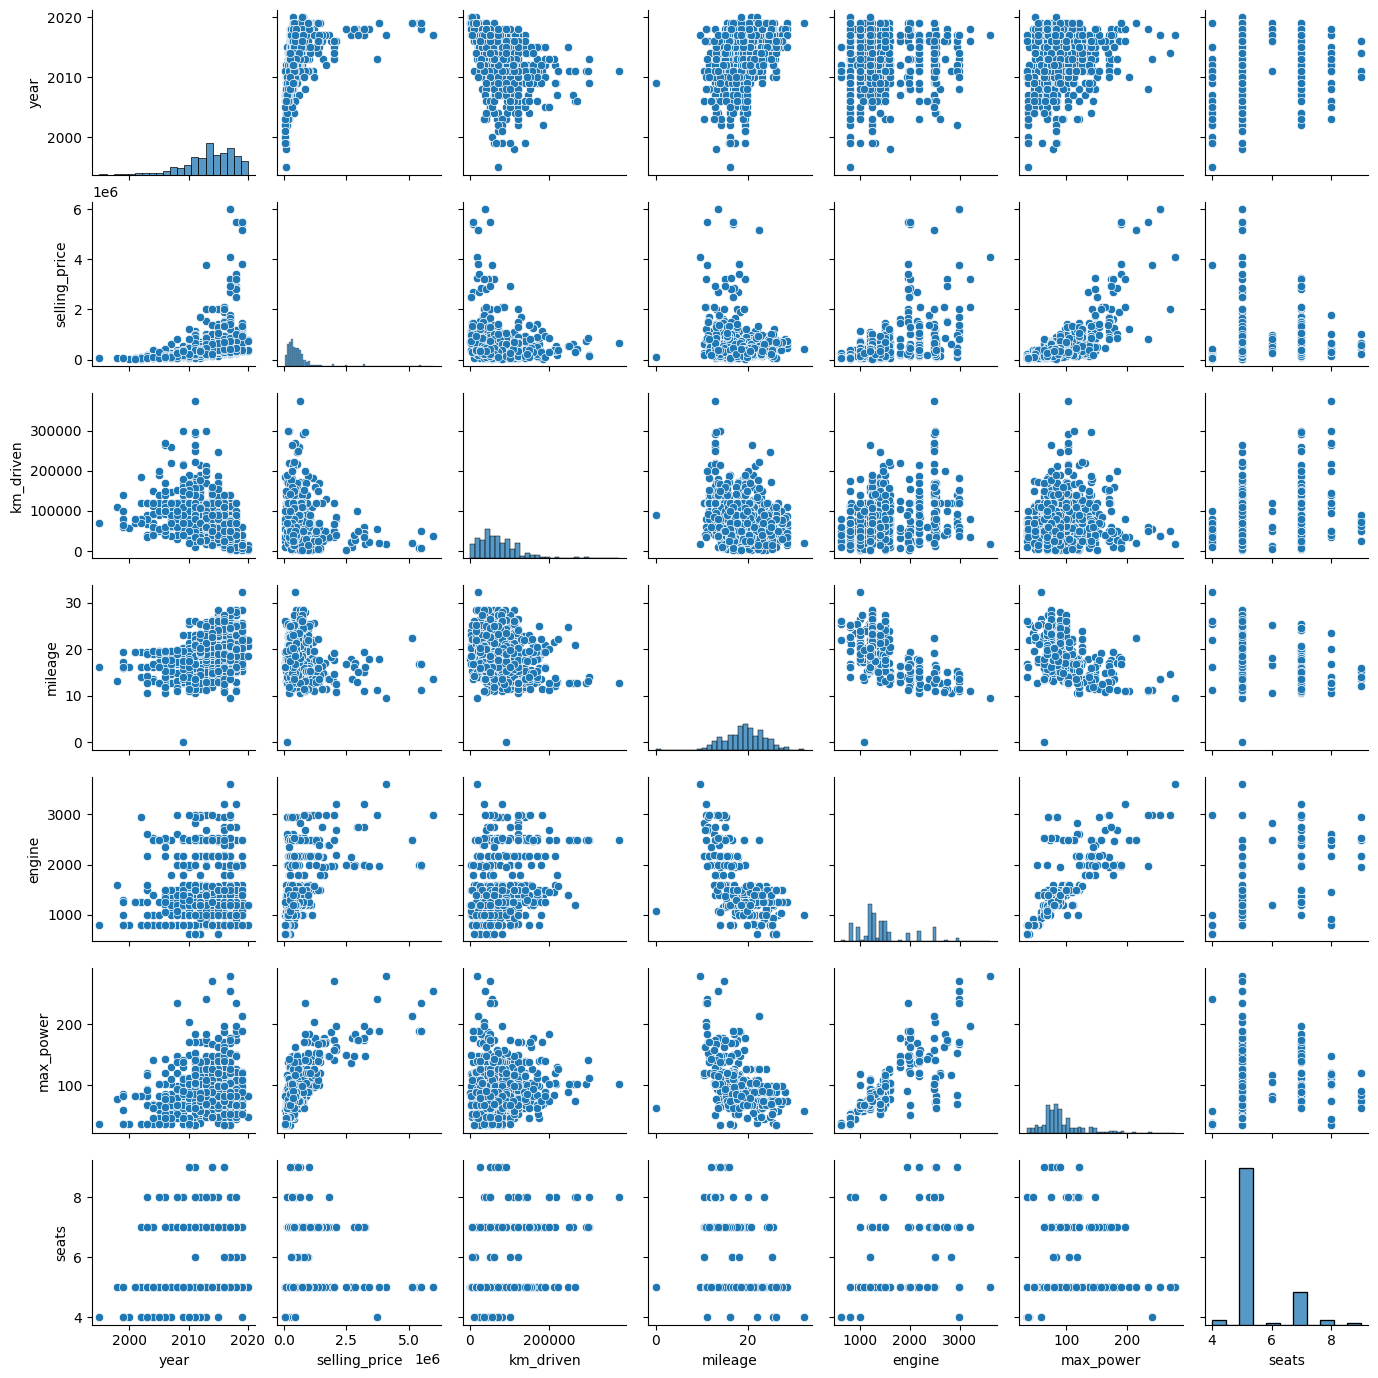

In [ ]:
sns.pairplot(df_test[numerical_cols], height=2)
plt.show()

Ответ: На основе распределения связей сказать о целевой переменной в обычном виде оказалась давольно сложно.

Ответ: Да, совокупности при разделении на трейн и тест оказались похожи, если не принимать во внимание масштаб значений.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [25]:
correlation_matrix = df_train[numerical_cols].corr(method='pearson')

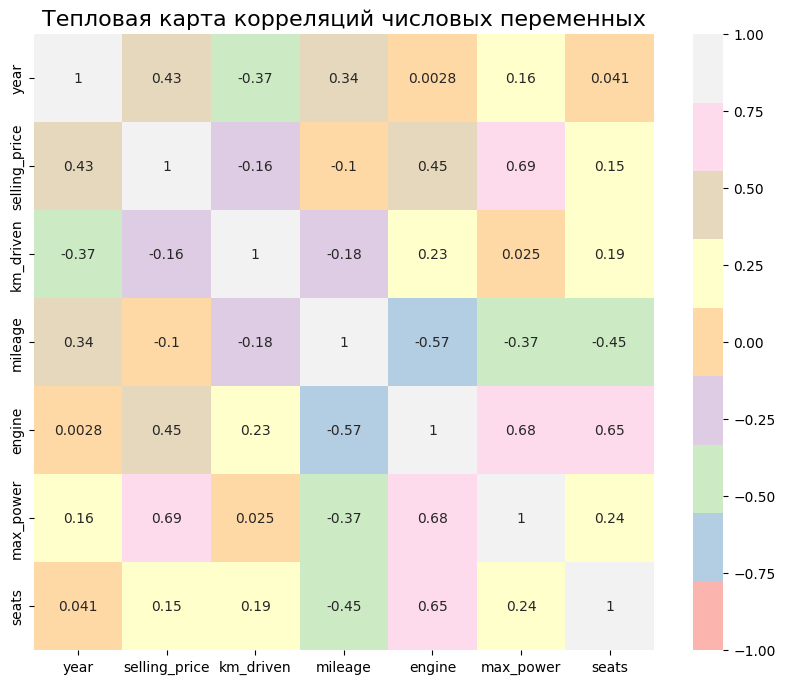

In [26]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', vmin=-1, vmax=1)
ax.set_title('Тепловая карта корреляций числовых переменных', fontsize=16)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Ответ: max_power и km_driven наименее скоррелированы между собой, между max_power и целевой переменной selling_price довольно сильная положительная линейная зависимость, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи можно будет ошибкой.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

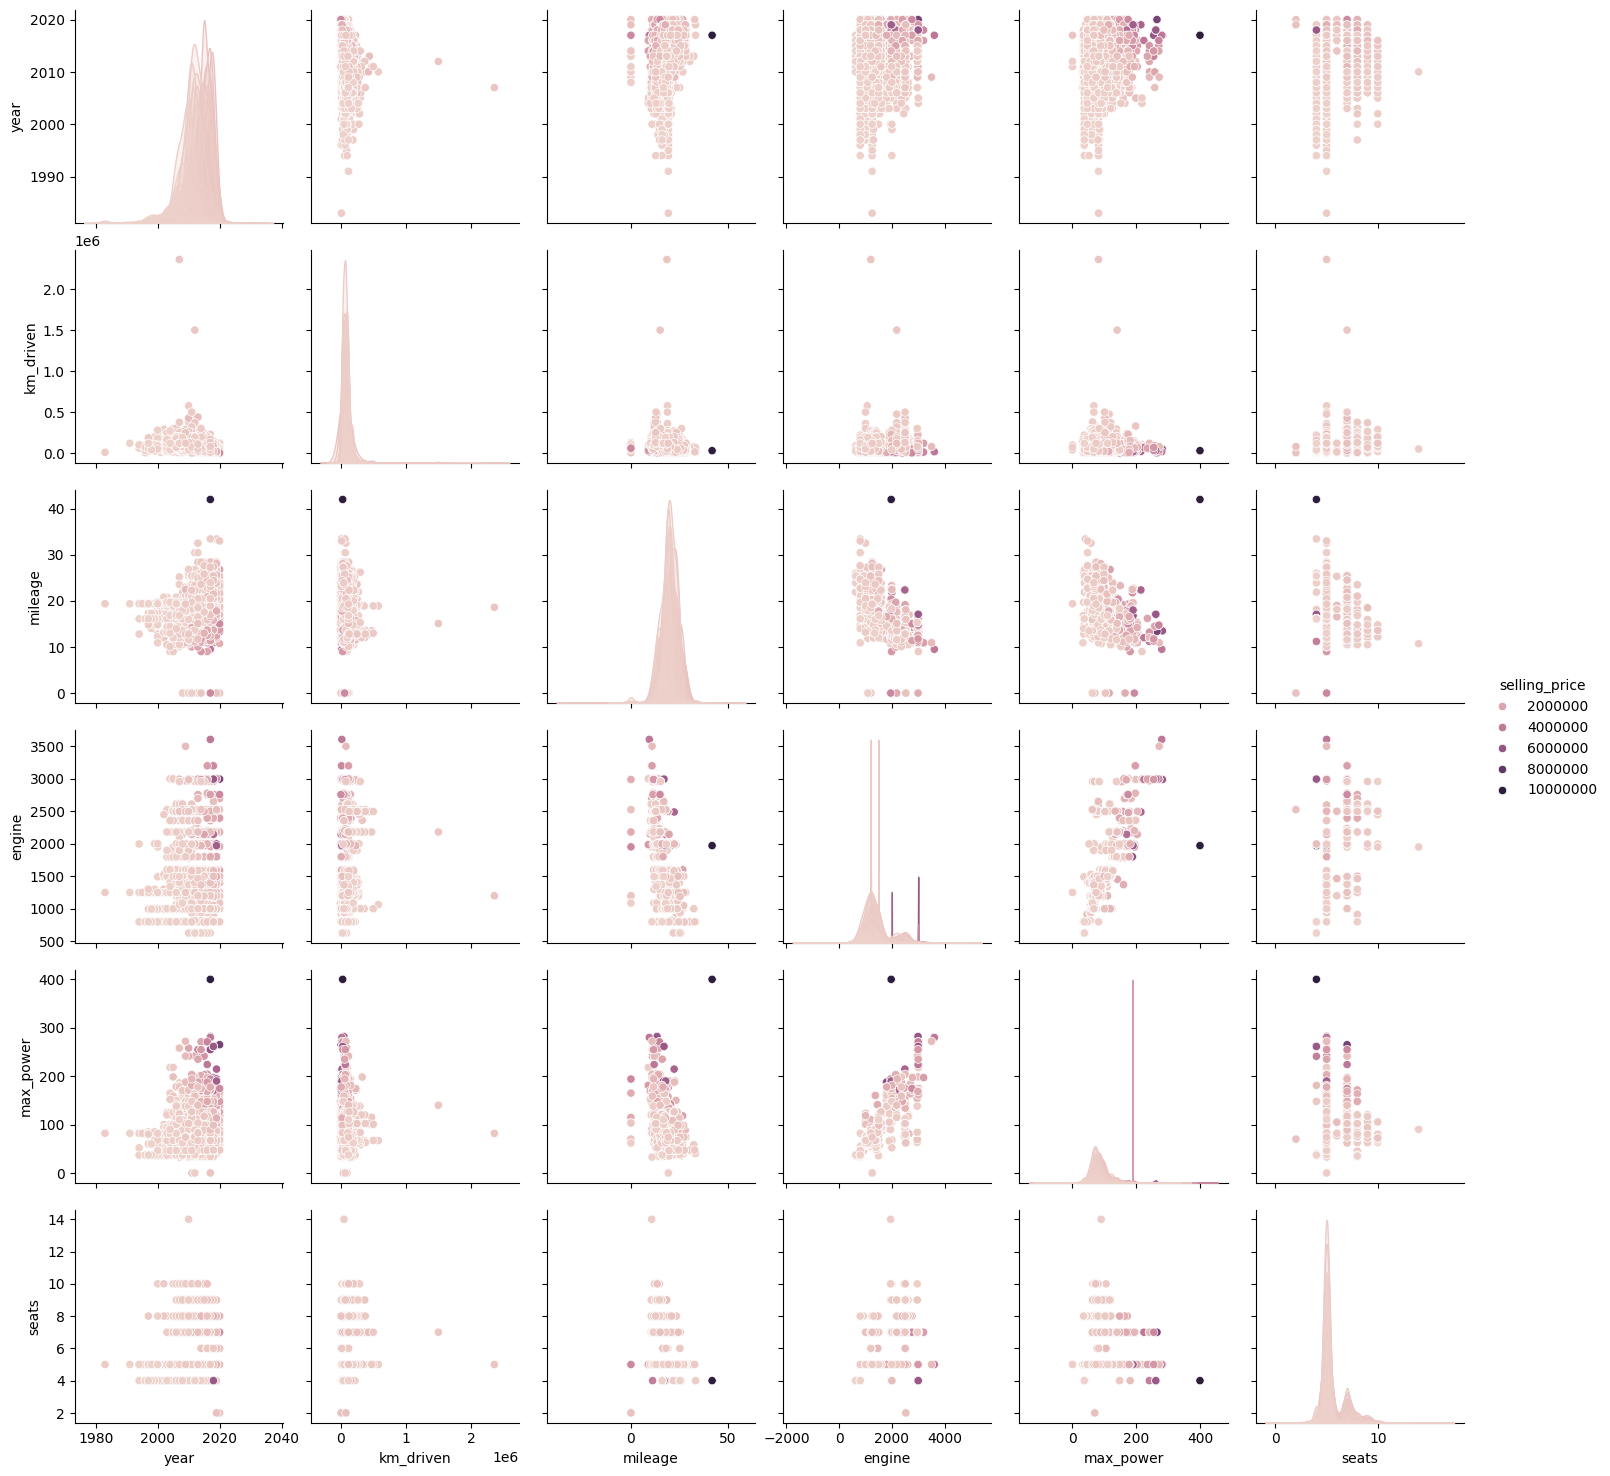

In [ ]:
sns.pairplot(df_train[numerical_cols], hue='selling_price')
plt.show()

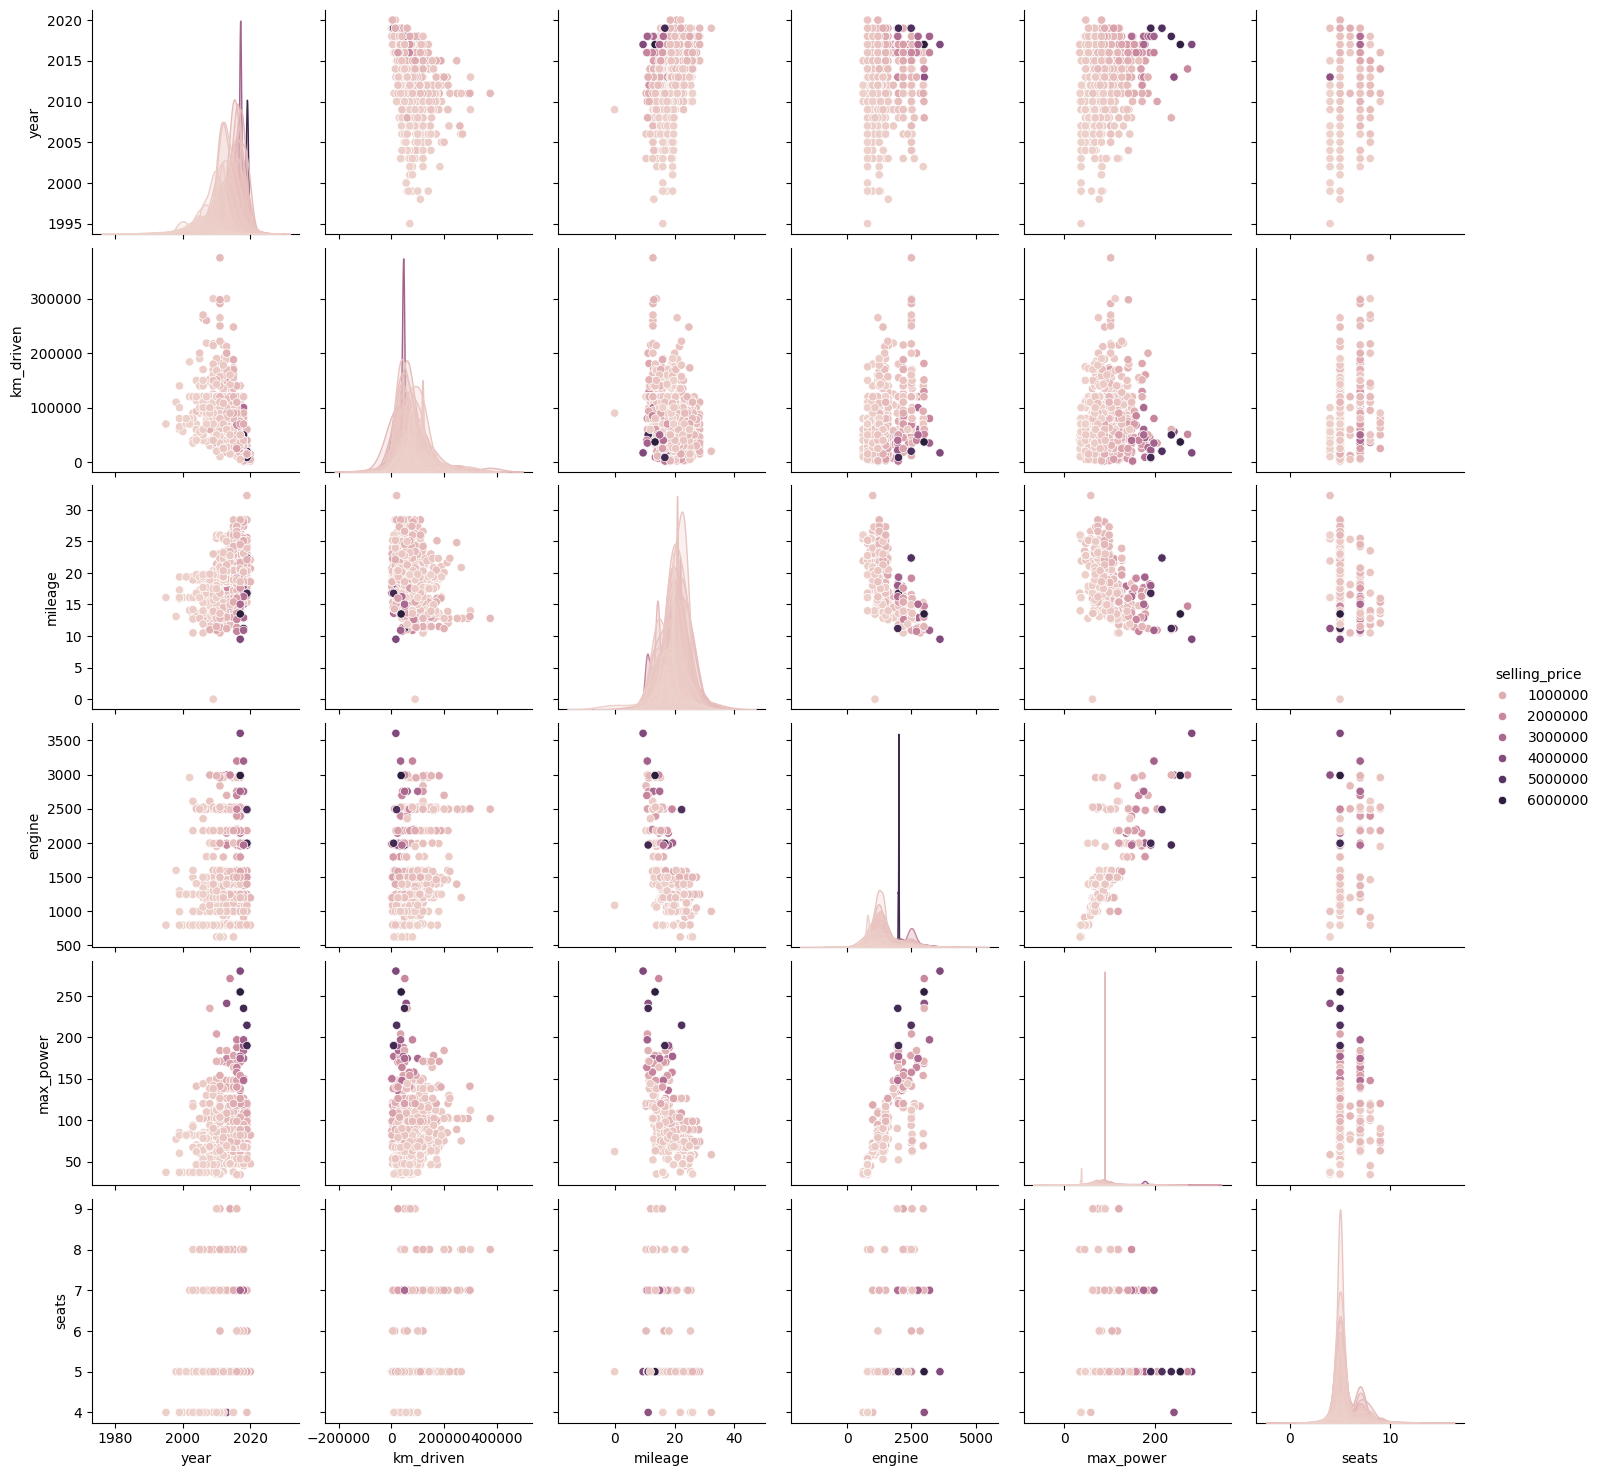

In [ ]:
sns.pairplot(df_test[numerical_cols], hue='selling_price')
plt.show()

Ответ: Несмотря на то, что распределения связей не такое информативное как хотелось бы, можно лучше проследить связь, выделив целевую переменную.

In [27]:
filtred_train = df_train[numerical_cols].drop('selling_price', axis=1)

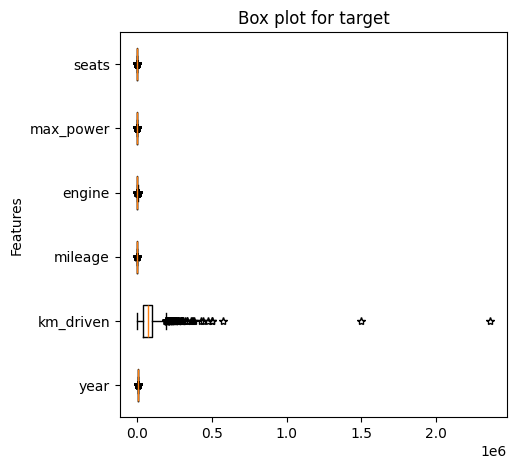

In [28]:
fig,ax = plt.subplots(figsize=(5,5))
ax.boxplot(x=filtred_train,
           vert=False,
           labels=filtred_train.columns,
           sym='*'
          )
plt.title('Box plot for target')
plt.ylabel('Features')
plt.plot();

In [29]:
filtred_test = df_test[numerical_cols].drop('selling_price', axis=1)

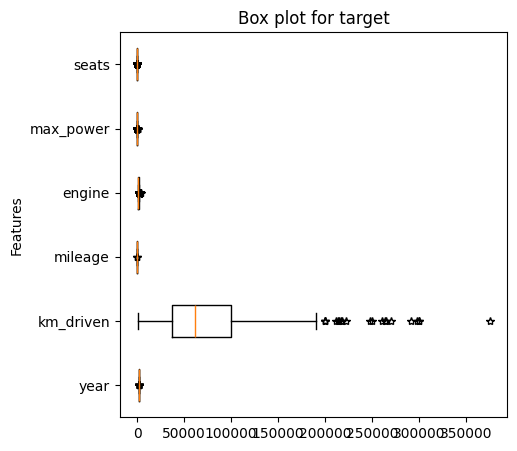

In [30]:
fig,ax = plt.subplots(figsize=(5,5))
ax.boxplot(x=filtred_test,
           vert=False,
           labels=filtred_test.columns,
           sym='*'
          )
plt.title('Box plot for target')
plt.ylabel('Features')
plt.plot();

Ответ: По boxplot делаем вывод, что в будущем необходима нормализация и, возможно, удаление выбросов

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [31]:
y_train = df_train['selling_price']
X_train = df_train[numerical_cols].drop('selling_price', axis=1)

In [32]:
assert X_train.shape == (5840, 6)

In [33]:
y_test = df_test['selling_price']
X_test = df_test[numerical_cols].drop('selling_price', axis=1)

In [34]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
mse_train = MSE(y_train, y_pred_train)

y_pred_test = model.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)
mse_test = MSE(y_test, y_pred_test)

print(f"R2 для тренировочных данных: {r2_train:.3f}")
print(f"MSE для тренировочных данных: {mse_train:.3f}\n")

print(f"R2 для тестовых данных: {r2_test:.3f}")
print(f"MSE для тестовых данных: {mse_test:.3f}\n")

R2 для тренировочных данных: 0.592
MSE для тренировочных данных: 116874153930.029

R2 для тестовых данных: 0.594
MSE для тестовых данных: 233298779730.455



### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)

r2_train = r2_score(y_train, y_pred_train)
mse_train = MSE(y_train, y_pred_train)

y_pred_test = model.predict(X_test_scaled)

r2_test = r2_score(y_test, y_pred_test)
mse_test = MSE(y_test, y_pred_test)

print(f"R2 для тренировочных данных: {r2_train:.3f}")
print(f"MSE для тренировочных данных: {mse_train:.3f}\n")

print(f"R2 для тестовых данных: {r2_test:.3f}")
print(f"MSE для тестовых данных: {mse_test:.3f}\n")



R2 для тренировочных данных: 0.592
MSE для тренировочных данных: 116874153930.029

R2 для тестовых данных: 0.594
MSE для тестовых данных: 233298779730.450



### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

(array([2., 1., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([-44158.81852005,  -7462.20134212,  29234.4158358 ,  65931.03301373,
        102627.65019166, 139324.26736959, 176020.88454752, 212717.50172545,
        249414.11890338, 286110.73608131, 322807.35325923]),
 <BarContainer object of 10 artists>)

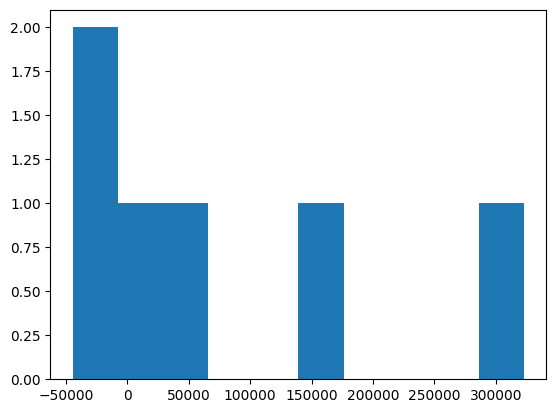

In [37]:
plt.hist(model.coef_)

In [38]:
abs_coefficients = np.abs(model.coef_)
most_important_feature_index = np.argmax(abs_coefficients)
most_important_feature_name = X_train.columns[most_important_feature_index]
print(f"Наиболее информативныи признак: {most_important_feature_name}")

Наиболее информативныи признак: max_power


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [39]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.25)
lasso_model.fit(X_train_scaled, y_train)

y_pred_train = lasso_model.predict(X_train_scaled)

r2_train = r2_score(y_train, y_pred_train)
mse_train = MSE(y_train, y_pred_train)

y_pred_test = lasso_model.predict(X_test_scaled)

r2_test = r2_score(y_test, y_pred_test)
mse_test = MSE(y_test, y_pred_test)

print(f"R2 для тренировочных данных: {r2_train:.3f}")
print(f"MSE для тренировочных данных: {mse_train:.3f}\n")

print(f"R2 для тестовых данных: {r2_test:.3f}")
print(f"MSE для тестовых данных: {mse_test:.3f}\n")

R2 для тренировочных данных: 0.592
MSE для тренировочных данных: 116874153930.663

R2 для тестовых данных: 0.594
MSE для тестовых данных: 233298947443.584



In [40]:
nonzero_coeffs = np.count_nonzero(lasso_model.coef_)
total_coeffs = len(lasso_model.coef_)

print(f"L1-регуляризация занулила {total_coeffs - nonzero_coeffs} коэффициентов из {total_coeffs}.")

L1-регуляризация занулила 0 коэффициентов из 6.


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

param_grid = {'alpha': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']

lasso_best = grid_search.best_estimator_.coef_
nonzero_weights = np.count_nonzero(lasso_best)
total_weights = len(lasso_best)

print(f"Оптимальное значение alpha: {best_alpha}")
print(f"{total_weights - nonzero_weights} из {total_weights} весов стало нулевым.")

Оптимальное значение alpha: 10
0 из 6 весов стало нулевым.


Ответ: 5 значений alpha, 10 фолов в кросс-валидации. Всего 50 моделеи.

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [42]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.25, 0.5, 0.75]
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

elasticnet_best = grid_search.best_estimator_.coef_
nonzero_weights = np.count_nonzero(elasticnet_best)
total_weights = len(elasticnet_best)

print(f"Оптимальное значение alpha: {best_alpha}")
print(f"Оптимальное значение l1_ratio: {best_l1_ratio}")
print(f"{total_weights - nonzero_weights} из {total_weights} весов стало нулевым.")

Оптимальное значение alpha: 0.01
Оптимальное значение l1_ratio: 0.25
0 из 6 весов стало нулевым.


Ответ:  150 моделей для обучения

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [43]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'], axis=1)
X_test_cat = df_test.drop(columns=['name', 'selling_price'], axis=1)

In [44]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [45]:
assert X_train_cat.shape == (5840, 10)

In [46]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5840 non-null   int64  
 1   km_driven     5840 non-null   int64  
 2   fuel          5840 non-null   object 
 3   seller_type   5840 non-null   object 
 4   transmission  5840 non-null   object 
 5   owner         5840 non-null   object 
 6   mileage       5840 non-null   float64
 7   engine        5840 non-null   int64  
 8   max_power     5840 non-null   float64
 9   seats         5840 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 456.4+ KB


In [47]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [48]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

numerical_columns = X_train_cat.columns.difference(categorical_cols + ['seats'])

encoder = OneHotEncoder(drop='first').fit(X_train_cat[categorical_cols])

train_encoded = encoder.transform(X_train_cat[categorical_cols])

category_column_names = encoder.get_feature_names_out().tolist()

train_encoded_df = pd.DataFrame(train_encoded.toarray(), columns=category_column_names)

X_train_final = pd.concat([X_train_cat[numerical_columns], X_train_cat['seats'], train_encoded_df], axis=1)

test_encoded = encoder.transform(X_test_cat[categorical_cols])

test_encoded_df = pd.DataFrame(test_encoded.toarray(), columns=category_column_names)

X_test_final = pd.concat([X_test_cat[numerical_columns], X_test_cat['seats'], test_encoded_df], axis=1)

In [49]:
X_train_final

,engine,km_driven,max_power,mileage,year,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1248,145500,74.00,23.40,2014,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1498,120000,103.52,21.14,2014,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1396,127000,90.00,23.00,2010,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1298,120000,88.20,16.10,2007,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1197,45000,81.86,20.14,2017,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,1086,191000,62.10,17.92,2008,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5836,998,50000,67.10,18.90,2013,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5837,1197,110000,82.85,18.50,2013,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5838,1493,119000,110.00,16.80,2007,5,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [50]:
X_test_final

,engine,km_driven,max_power,mileage,year,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2498,168000,112.00,14.00,2010,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1497,25000,108.50,21.50,2017,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1799,218463,130.00,12.90,2007,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1498,173000,98.60,25.10,2015,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1172,70000,65.00,16.50,2011,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1086,100000,68.05,19.81,2008,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
996,1197,50000,81.83,18.60,2017,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
997,1396,40000,90.00,23.00,2009,5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,1197,25000,78.90,20.36,2012,5,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2', n_jobs=-1)

grid_search.fit(X_train_final, y_train)

best_alpha = grid_search.best_params_['alpha']

ridge_best = grid_search.best_estimator_

y_pred_train = ridge_best.predict(X_train_final)
y_pred_test = ridge_best.predict(X_test_final)

r2_train = r2_score(y_train, y_pred_train)
mse_train = MSE(y_train, y_pred_train)

r2_test = r2_score(y_test, y_pred_test)
mse_test = MSE(y_test, y_pred_test)

print(f"Оптимальное значение alpha: {best_alpha}")
print(f"R2 для тренировочных данных: {r2_train:.3f}")
print(f"MSE для тренировочных данных: {mse_train:.3f}\n")

print(f"R2 для тестовых данных: {r2_test:.3f}")
print(f"MSE для тестовых данных: {mse_test:.3f}\n")

Оптимальное значение alpha: 10
R2 для тренировочных данных: 0.636
MSE для тренировочных данных: 104329754899.679

R2 для тестовых данных: 0.639
MSE для тестовых данных: 207550220430.898



Ответ: Да, метрики улучшились, но все равно далеки от идеальных.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [52]:
lasso_model = Lasso(alpha=0.25)
lasso_model.fit(X_train_final, y_train)

y_pred_train_lasso = lasso_model.predict(X_train_final)
y_pred_test_lasso = lasso_model.predict(X_test_final)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_final, y_train)

y_pred_train_ridge = ridge_model.predict(X_train_final)
y_pred_test_ridge = ridge_model.predict(X_test_final)

def business_metric(y_true, y_pred):
    absolute_difference = np.abs(y_true - y_pred)
    percentage_deviation = absolute_difference / y_true * 100
    within_threshold = np.sum(percentage_deviation <= 10)
    return within_threshold / len(y_true)

metric_train_lasso = business_metric(y_train, y_pred_train_lasso)
metric_test_lasso = business_metric(y_test, y_pred_test_lasso)

metric_train_ridge = business_metric(y_train, y_pred_train_ridge)
metric_test_ridge = business_metric(y_test, y_pred_test_ridge)

print("Результаты для модели Lasso:")
print(f"Метрика для тренировочных данных: {metric_train_lasso:.3f}")
print(f"Метрика для тестовых данных: {metric_test_lasso:.3f}")

print("\nРезультаты для модели Ridge:")
print(f"Метрика для тренировочных данных: {metric_train_ridge:.3f}")
print(f"Метрика для тестовых данных: {metric_test_ridge:.3f}")

if metric_test_lasso > metric_test_ridge:
    print("\nМодель Lasso лучше подходит для задач бизнеса.")
else:
    print("\nМодель Ridge лучше подходит для задач бизнеса.")

Результаты для модели Lasso:
Метрика для тренировочных данных: 0.211
Метрика для тестовых данных: 0.236

Результаты для модели Ridge:
Метрика для тренировочных данных: 0.209
Метрика для тестовых данных: 0.235

Модель Lasso лучше подходит для задач бизнеса.


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

